# Algorithm Evaluation -  setting parameters


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

## Parameters Tuning with GridSearch

In [4]:
from sklearn.model_selection import GridSearchCV  #cv=cross validation
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from sklearn.neural_network  import MLPClassifier

## Credit Data

In [6]:
with open('credit.pkl', 'rb') as f:
    x_credit_training, y_credit_training, x_credit_test, y_credit_test = pickle.load(f)

In [7]:
x_credit_training.shape, y_credit_training.shape, x_credit_test.shape, y_credit_test.shape

((1500, 3), (1500,), (500, 3), (500,))

In [8]:
x_credit = np.concatenate((x_credit_training,x_credit_test), axis=0) #0 = rows
y_credit = np.concatenate((y_credit_training,y_credit_test), axis=0) #0 = rows

x_credit.shape , y_credit.shape

((2000, 3), (2000,))

## Decision Tree

In [11]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'])

In [22]:
parameters = {'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_split': [2,5,10],
              'min_samples_leaf' : [1,5,10]}


In [23]:
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),
                           param_grid = parameters) #it will test all combinations of parameters
grid_search.fit(x_credit, y_credit)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [24]:
print(best_parameters) , print(best_result)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


(None, None)

## Random Forest

In [17]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
parameters = {'criterion': ['gini','entropy'],
              'n_estimators': [10,40,100,150],
              'min_samples_split': [2,5,10],
              'min_samples_leaf' : [1,5,10]}


In [26]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = parameters) #it will test all combinations of parameters
grid_search.fit(x_credit, y_credit)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [27]:
print(best_parameters) , print(best_result)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}
0.9865


(None, None)

## KNN

In [21]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [28]:
parameters = {'n_neighbors': [3,5,10,20],
              'p': [1,2]}

In [29]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters) #it will test all combinations of parameters
grid_search.fit(x_credit, y_credit)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [30]:
print(best_parameters) , print(best_result)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


(None, None)

## Logistic Regression

In [18]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
parameters = {'tol': [0.0001,0.00001,0.000001],
              'C': [1.0,1.5,2.0],
              'solver' :['lbfgs','sag','saga']}

In [32]:
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters) #it will test all combinations of parameters
grid_search.fit(x_credit, y_credit)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [33]:
print(best_parameters) , print(best_result)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


(None, None)

## SVM

In [22]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [34]:
parameters = {'tol': [0.001,0.0001,0.00001],
              'C': [1.0,1.5,2.0],
              'kernel' :['rbf','linear','poly','sigmoid']}

In [35]:
grid_search = GridSearchCV(estimator = SVC(),
                           param_grid = parameters) #it will test all combinations of parameters
grid_search.fit(x_credit, y_credit)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

In [36]:
print(best_parameters) , print(best_result)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


(None, None)

## Neural Network

In [26]:
MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [37]:
parameters = {'activation': ['relu','logistic','tahn'],
              'solver': ['adam','sgd'],
              'batch_size' :[10,56]}

In [38]:
grid_search = GridSearchCV(estimator = MLPClassifier(),
                           param_grid = parameters) #it will test all combinations of parameters
grid_search.fit(x_credit, y_credit)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

In [39]:
print(best_parameters) , print(best_result)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9970000000000001


(None, None)

# Cross Validation

In [7]:
from sklearn.model_selection import cross_val_score, KFold

## Decision Tree

In [8]:
tree_results = []

for i in range(30): #30 is very common
    #print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    #results found on Tuning with GridSearch
    #{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
    tree_decision = DecisionTreeClassifier(criterion='entropy',
                                           min_samples_leaf=1,
                                           min_samples_split=5,
                                           splitter='best')
    score = cross_val_score(tree_decision,x_credit,y_credit, cv=kfold)
    #print(score)
    #print(score.mean())
    tree_results.append(score.mean())

tree_results

[0.9864999999999998,
 0.986,
 0.9905000000000002,
 0.9869999999999999,
 0.9884999999999999,
 0.9884999999999999,
 0.9884999999999999,
 0.9875,
 0.9860000000000001,
 0.9869999999999999,
 0.9865,
 0.9899999999999999,
 0.9884999999999999,
 0.9864999999999998,
 0.9835,
 0.9854999999999998,
 0.9855,
 0.9904999999999999,
 0.9875,
 0.9869999999999999,
 0.984,
 0.9870000000000001,
 0.9889999999999999,
 0.9875,
 0.9880000000000001,
 0.9880000000000001,
 0.9879999999999999,
 0.9855,
 0.9864999999999998,
 0.9875]

## Random Forest

In [9]:
random_f_results = []

for i in range(30): #30 is very common
    #print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    #results found on Tuning with GridSearch
    #{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}
    tree_decision = RandomForestClassifier(criterion='entropy',
                                           min_samples_leaf=1,
                                           min_samples_split=5,
                                           n_estimators=40)
    score = cross_val_score(tree_decision,x_credit,y_credit, cv=kfold)
    #print(score)
    #print(score.mean())
    random_f_results.append(score.mean())

random_f_results

[0.985,
 0.9844999999999999,
 0.9869999999999999,
 0.9875,
 0.9875,
 0.9880000000000001,
 0.9860000000000001,
 0.9890000000000001,
 0.9869999999999999,
 0.9874999999999998,
 0.9855,
 0.9894999999999999,
 0.9865,
 0.986,
 0.9850000000000001,
 0.9865,
 0.9854999999999998,
 0.9889999999999999,
 0.9884999999999999,
 0.9875,
 0.9865,
 0.9875,
 0.9874999999999998,
 0.9879999999999999,
 0.9855,
 0.9874999999999998,
 0.9884999999999999,
 0.9855,
 0.9869999999999999,
 0.9864999999999998]

## KNN

In [10]:
knn_results = []

for i in range(30): #30 is very common
    #print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    #results found on Tuning with GridSearch
    #{'n_neighbors': 20, 'p': 1}
    tree_decision = KNeighborsClassifier(n_neighbors=20,
                                           p=1)
    score = cross_val_score(tree_decision,x_credit,y_credit, cv=kfold)
    #print(score)
    #print(score.mean())
    knn_results.append(score.mean())

knn_results

[0.9800000000000001,
 0.9800000000000001,
 0.9799999999999999,
 0.9799999999999999,
 0.9809999999999999,
 0.9785,
 0.9799999999999999,
 0.9804999999999999,
 0.9809999999999999,
 0.9809999999999999,
 0.978,
 0.9804999999999999,
 0.9809999999999999,
 0.9799999999999999,
 0.9795,
 0.9795,
 0.9804999999999999,
 0.983,
 0.9800000000000001,
 0.9804999999999999,
 0.9799999999999999,
 0.9810000000000001,
 0.9810000000000001,
 0.9800000000000001,
 0.9835,
 0.9814999999999999,
 0.9795,
 0.9795,
 0.9775,
 0.978]

## Logistic Regression

In [11]:
logistic_results = []

for i in range(30): #30 is very common
    #print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    #results found on Tuning with GridSearch
    #{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
    tree_decision = LogisticRegression(C=1.0,
                                       solver='lbfgs',
                                       tol=0.0001)
    score = cross_val_score(tree_decision,x_credit,y_credit, cv=kfold)
    #print(score)
    #print(score.mean())
    logistic_results.append(score.mean())

logistic_results

[0.9475,
 0.9465,
 0.9470000000000001,
 0.946,
 0.9465,
 0.9465,
 0.9469999999999998,
 0.9480000000000001,
 0.9465,
 0.9465,
 0.9475,
 0.9479999999999998,
 0.9475,
 0.9484999999999999,
 0.9484999999999999,
 0.9475,
 0.946,
 0.9470000000000001,
 0.9465,
 0.9464999999999998,
 0.9465,
 0.9469999999999998,
 0.9455,
 0.9465,
 0.9475000000000001,
 0.9469999999999998,
 0.9475,
 0.9465,
 0.9480000000000001,
 0.9465]

## SVM

In [12]:
svm_results = []

for i in range(30): #30 is very common
    #print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    #results found on Tuning with GridSearch
    #{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}

    tree_decision = SVC(C=1.5,
                        kernel='rbf',
                        tol=0.001)
    score = cross_val_score(tree_decision,x_credit,y_credit, cv=kfold)
    #print(score)
    #print(score.mean())
    svm_results.append(score.mean())

svm_results

[0.9835,
 0.984,
 0.9834999999999999,
 0.9844999999999999,
 0.9855,
 0.9835,
 0.9839999999999998,
 0.9845,
 0.982,
 0.9829999999999999,
 0.9824999999999999,
 0.9825000000000002,
 0.9844999999999999,
 0.984,
 0.9834999999999999,
 0.9845,
 0.984,
 0.9844999999999999,
 0.985,
 0.9839999999999998,
 0.9835,
 0.985,
 0.9844999999999999,
 0.9870000000000001,
 0.9839999999999998,
 0.982,
 0.9825000000000002,
 0.9850000000000001,
 0.983,
 0.986]

## Neural Network

In [44]:
neural_results = []

for i in range(30): #30 is very common
    #print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    #results found on Tuning with GridSearch
    #{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
    tree_decision = MLPClassifier(activation='relu',
                                  batch_size=10,
                                  solver='adam')
    score = cross_val_score(tree_decision,x_credit,y_credit, cv=kfold)
    #print(score)
    #print(score.mean())
    neural_results.append(score.mean())

neural_results

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.9964999999999999,
 0.9955,
 0.9974999999999999,
 0.9964999999999999,
 0.9964999999999999,
 0.9959999999999999,
 0.998,
 0.9964999999999999,
 0.9955,
 0.9964999999999999,
 0.9964999999999998,
 0.9969999999999999,
 0.9970000000000001,
 0.998,
 0.9964999999999999,
 0.9974999999999999,
 0.9964999999999999,
 0.998,
 0.9969999999999999,
 0.9964999999999999,
 0.9964999999999999,
 0.9950000000000001,
 0.9974999999999999,
 0.9954999999999998,
 0.9964999999999999,
 0.9955,
 0.9974999999999999,
 0.9955,
 0.9955,
 0.9975000000000002]

# Descriptive Statistics

In [45]:
results = pd.DataFrame({"Decision Tree": tree_results,
                        'Random Forest': random_f_results,
                        "KNN": knn_results,
                        "Logistic Regression": logistic_results,
                        'SVM': svm_results
                        ,
                        'Neural Network': neural_results
                        })
results

,Decision Tree,Random Forest,KNN,Logistic Regression,SVM,Neural Network
0,0.9865,0.9850,0.9800,0.9475,0.9835,0.9965
1,0.9860,0.9845,0.9800,0.9465,0.9840,0.9955
2,0.9905,0.9870,0.9800,0.9470,0.9835,0.9975
3,0.9870,0.9875,0.9800,0.9460,0.9845,0.9965
4,0.9885,0.9875,0.9810,0.9465,0.9855,0.9965
5,0.9885,0.9880,0.9785,0.9465,0.9835,0.9960
6,0.9885,0.9860,0.9800,0.9470,0.9840,0.9980
7,0.9875,0.9890,0.9805,0.9480,0.9845,0.9965
8,0.9860,0.9870,0.9810,0.9465,0.9820,0.9955
9,0.9870,0.9875,0.9810,0.9465,0.9830,0.9965


In [46]:
results.describe()

,Decision Tree,Random Forest,KNN,Logistic Regression,SVM,Neural Network
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987267,0.986950,0.980200,0.947000,0.983983,0.996600
std,0.001654,0.001296,0.001270,0.000743,0.001141,0.000845
min,0.983500,0.984500,0.977500,0.945500,0.982000,0.995000
25%,0.986500,0.986000,0.979625,0.946500,0.983500,0.996125
50%,0.987250,0.987000,0.980000,0.947000,0.984000,0.996500
75%,0.988375,0.987500,0.981000,0.947500,0.984500,0.997375
max,0.990500,0.989500,0.983500,0.948500,0.987000,0.998000


We look for biggest accuracy and lower standard deviation.

In [47]:
#coefficient of variation
(results.std()/results.mean())*100

Decision Tree          0.167566
Random Forest          0.131268
KNN                    0.129601
Logistic Regression    0.078435
SVM                    0.115937
Neural Network         0.084775
dtype: float64

# Normality Test

In [49]:
from scipy.stats import shapiro

In [50]:
alpha = 0.05
shapiro(tree_results), shapiro(random_f_results), shapiro(knn_results), shapiro(logistic_results), shapiro(svm_results), shapiro(neural_results)

(ShapiroResult(statistic=0.9730744561652352, pvalue=0.6262436700248288),
 ShapiroResult(statistic=0.9704065887959453, pvalue=0.5503599624406803),
 ShapiroResult(statistic=0.9244038395262003, pvalue=0.034943496356096226),
 ShapiroResult(statistic=0.9309147727892649, pvalue=0.051930740130906254),
 ShapiroResult(statistic=0.9637296501153583, pvalue=0.3843395265785937),
 ShapiroResult(statistic=0.9213538922496008, pvalue=0.02908424654499095))

**Shapiro Wilk Normality Test**

H0: sample is normally distribution
H1: the distribution is not the normal dist.

If p-value >= alpha, then we can NOT REJECT the null hypothesis (H0), aka, the sample have a normal distribution.

If p-value < alpha, then we CAN REJECT the null hypothesis (H0), aka, the sample have not a normal distribution. 

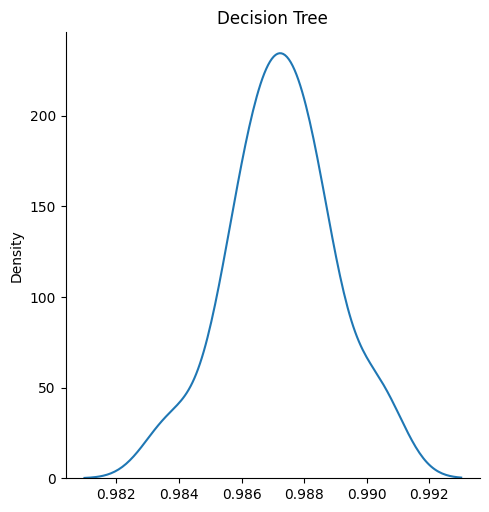

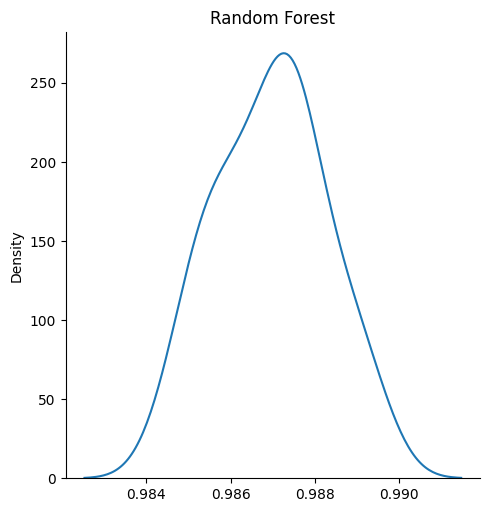

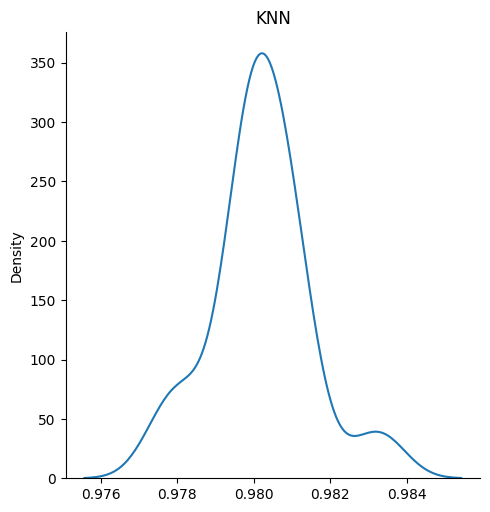

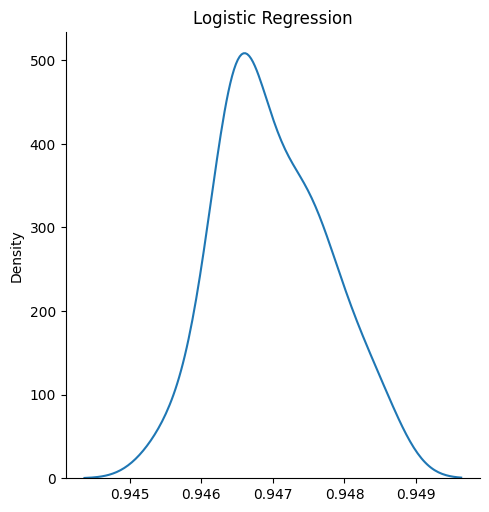

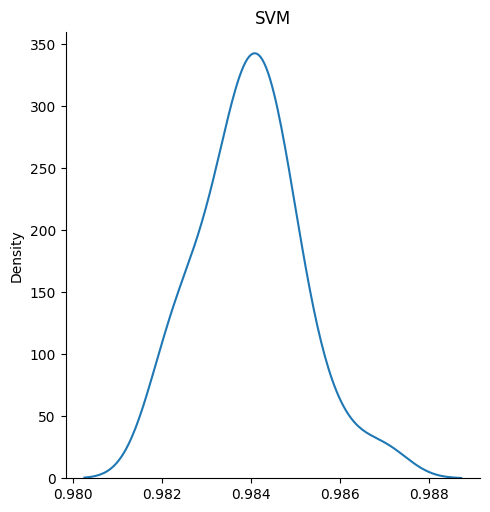

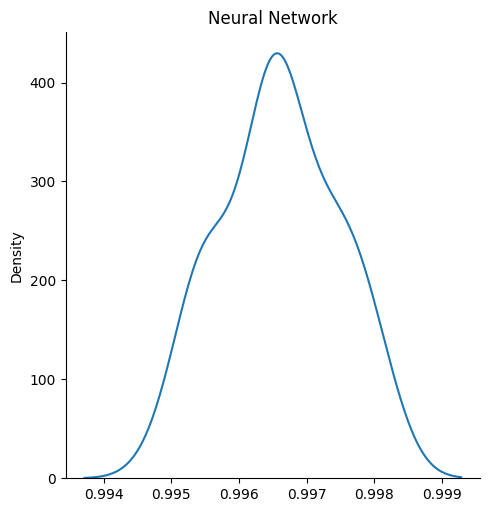

In [51]:
sns.displot(tree_results, kind='kde').set(title="Decision Tree"),
sns.displot(random_f_results, kind='kde').set(title="Random Forest"),
sns.displot(knn_results, kind='kde').set(title="KNN")
sns.displot(logistic_results, kind='kde').set(title="Logistic Regression")
sns.displot(svm_results, kind='kde').set(title="SVM")
sns.displot(neural_results, kind='kde').set(title="Neural Network")

# ANOVA Test

In [52]:
from scipy.stats import f_oneway

In [53]:
p = f_oneway(tree_results,random_f_results,knn_results,logistic_results,svm_results,neural_results)
p

F_onewayResult(statistic=6202.047763588538, pvalue=5.581549019370865e-194)

In [54]:
alpha = 0.05
if p.pvalue <= alpha:
    print('H0 can be REJECTED. Aka, data is different or data mean is different.')
else:
    print('H0 can be NOT REJECTED. Aka, data is the same or mean of groups are the same.')

H0 can be REJECTED. Aka, data is different or data mean is different.


# Tukey test

In [55]:
algorithm_results = {'accuracy': np.concatenate([tree_results,random_f_results,knn_results,logistic_results,svm_results,neural_results]),
                     'algorithm': 
                     ['tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree',
                      'random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f','random_f',
                      'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                      'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                      'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                      'neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net','neural_net']}

In [56]:
algorithm_results_df = pd.DataFrame(algorithm_results)
algorithm_results_df

,accuracy,algorithm
0,0.9865,tree
1,0.9860,tree
2,0.9905,tree
3,0.9870,tree
4,0.9885,tree
...,...,...
175,0.9955,neural_net
176,0.9975,neural_net
177,0.9955,neural_net
178,0.9955,neural_net


In [57]:
from statsmodels.stats.multicomp import MultiComparison

In [58]:
comparison = MultiComparison(algorithm_results_df['accuracy'],algorithm_results_df['algorithm'])

In [59]:
tukey_test = comparison.tukeyhsd()
print(tukey_test)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
       knn   logistic  -0.0332    0.0 -0.0341 -0.0323   True
       knn neural_net   0.0164    0.0  0.0155  0.0173   True
       knn   random_f   0.0067    0.0  0.0059  0.0076   True
       knn        svm   0.0038    0.0  0.0029  0.0047   True
       knn       tree   0.0071    0.0  0.0062   0.008   True
  logistic neural_net   0.0496    0.0  0.0487  0.0505   True
  logistic   random_f   0.0399    0.0  0.0391  0.0408   True
  logistic        svm    0.037    0.0  0.0361  0.0379   True
  logistic       tree   0.0403    0.0  0.0394  0.0412   True
neural_net   random_f  -0.0097    0.0 -0.0105 -0.0088   True
neural_net        svm  -0.0126    0.0 -0.0135 -0.0117   True
neural_net       tree  -0.0093    0.0 -0.0102 -0.0084   True
  random_f        svm   -0.003    0.0 -0.0039 -0.0021   True
  random_f       tree   

H0: no statistic difference between the groups mean

H1: exists statistic difference

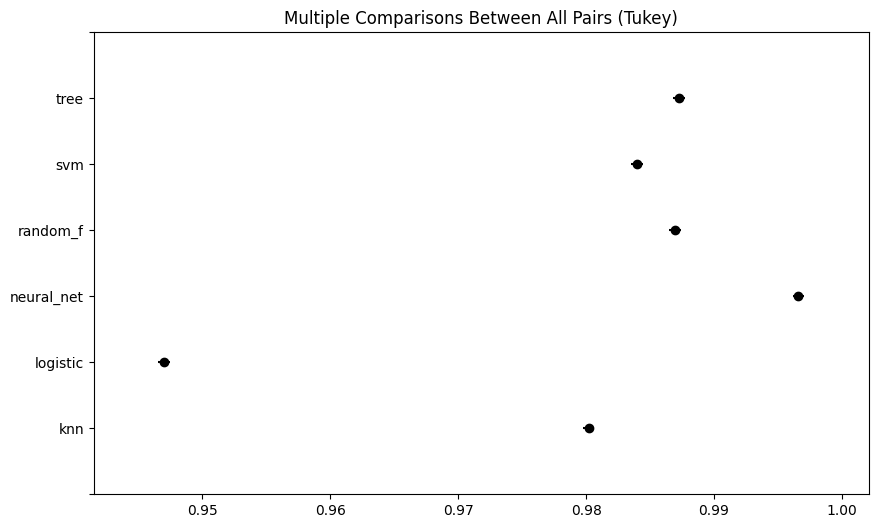

In [60]:
tukey_test.plot_simultaneous();

# Saving Model

In [40]:
#{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
class_neural_net = MLPClassifier(activation='relu',batch_size=10, solver='adam')
class_neural_net.fit(x_credit,y_credit)

MLPClassifier(batch_size=10)

In [41]:
#{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
class_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1,
                                    min_samples_split=5, splitter='best')
class_tree.fit(x_credit,y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [42]:
#{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
class_svm = SVC(C=1.5, kernel='rbf', tol=0.001)
class_svm.fit(x_credit,y_credit)

SVC(C=1.5)

In [43]:
pickle.dump(class_neural_net, open("neural_network_credit_model.sav", 'wb'))
pickle.dump(class_tree, open("decision_tree_credit_model.sav", 'wb'))
pickle.dump(class_svm, open("svm_credit_model.sav", 'wb'))

# Reading trained model

In [4]:
neural_network = pickle.load(open("neural_network_credit_model.sav", 'rb'))
decision_tree  = pickle.load( open("decision_tree_credit_model.sav", 'rb'))
svm = pickle.load(open("svm_credit_model.sav", 'rb'))

In [9]:
new_data_test = x_credit[0]
new_data_test

array([-1.3754462 ,  0.50630999,  0.10980934])

In [12]:
new_data_test = new_data_test.reshape(1,-1)
new_data_test

array([[-1.3754462 ,  0.50630999,  0.10980934]])

In [15]:
neural_network.predict(new_data_test), decision_tree.predict(new_data_test), svm.predict(new_data_test)

(array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64))

In [16]:
y_credit[0]

0